In [2]:
import random

def read_graph(file_path):
    vertices = {}  # 存储节点：{vertex_id: label}
    edges = []     # 存储边：[(v1, v2, label)]
    
    try:
        with open(file_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if not parts:
                    continue
                if parts[0] == 'v':
                    vertex_id, label = int(parts[1]), int(parts[2])
                    vertices[vertex_id] = label
                elif parts[0] == 'e':
                    v1, v2, label = int(parts[1]), int(parts[2]), int(parts[3])
                    edges.append((v1, v2, label))
    except FileNotFoundError:
        raise FileNotFoundError(f"File {file_path} not found.")
    except Exception as e:
        raise ValueError(f"Error reading file: {e}")
    
    return vertices, edges

def generate_subgraph(vertices, edges, num_vertices):
    if num_vertices > len(vertices):
        raise ValueError("Requested subgraph size is larger than the original graph.")
    
    # 随机选择指定数量的节点
    selected_vertex_ids = random.sample(list(vertices.keys()), num_vertices)
    
    # 创建新节点映射：旧ID -> 新ID（从0开始）
    vertex_map = {old_id: new_id for new_id, old_id in enumerate(selected_vertex_ids)}
    
    # 生成子图的节点
    subgraph_vertices = [(vertex_map[old_id], vertices[old_id]) for old_id in selected_vertex_ids]
    
    # 生成子图的边（只包含选定节点之间的边）
    subgraph_edges = []
    for v1, v2, label in edges:
        if v1 in vertex_map and v2 in vertex_map:
            subgraph_edges.append((vertex_map[v1], vertex_map[v2], label))
    
    return subgraph_vertices, subgraph_edges

def output_subgraph(subgraph_vertices, subgraph_edges):
    output = []
    # 输出节点
    for vid, label in sorted(subgraph_vertices, key=lambda x: x[0]):  # 按节点ID排序
        output.append(f"v {vid} {label}")
    # 输出边
    for v1, v2, label in subgraph_edges:
        output.append(f"e {v1} {v2} {label}")
    return "\n".join(output)

def main():
    # 文件路径
    file_path = "/home/cc/haibin2/amazon/6/data_graph/data.graph"
    
    # 读取图
    try:
        vertices, edges = read_graph(file_path)
    except (FileNotFoundError, ValueError) as e:
        print(e)
        return
    
    # 输入子图节点数
    try:
        # num_vertices = int(input("Enter the number of vertices for the subgraph: "))
        num_vertices = 6  # 直接设置为5
    except ValueError:
        print("Please enter a valid integer.")
        return
    
    try:
        # 生成子图
        subgraph_vertices, subgraph_edges = generate_subgraph(vertices, edges, num_vertices)
        # 输出子图
        result = output_subgraph(subgraph_vertices, subgraph_edges)
        print("Subgraph:")
        print(result)
    except ValueError as e:
        print(e)

if __name__ == "__main__":
    main()

Subgraph:
v 0 1
v 1 5
v 2 4
v 3 1
v 4 0
v 5 4


In [4]:
import random
from collections import defaultdict

def read_graph(file_path):
    vertices = {}  # 存储节点：{vertex_id: label}
    edges = []     # 存储边：[(v1, v2, label)]
    adj_list = defaultdict(list)  # 邻接表：{vertex_id: [(neighbor_id, edge_label)]}
    
    try:
        with open(file_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if not parts:
                    continue
                if parts[0] == 'v':
                    vertex_id, label = int(parts[1]), int(parts[2])
                    vertices[vertex_id] = label
                elif parts[0] == 'e':
                    v1, v2, label = int(parts[1]), int(parts[2]), int(parts[3])
                    edges.append((v1, v2, label))
                    # 构建无向图的邻接表
                    adj_list[v1].append((v2, label))
                    adj_list[v2].append((v1, label))
    except FileNotFoundError:
        raise FileNotFoundError(f"File {file_path} not found.")
    except Exception as e:
        raise ValueError(f"Error reading file: {e}")
    
    return vertices, edges, adj_list

def random_walk_subgraph(vertices, adj_list, num_vertices):
    if num_vertices > len(vertices):
        raise ValueError("Requested subgraph size is larger than the original graph.")
    if num_vertices <= 0:
        raise ValueError("Number of vertices must be positive.")
    
    # 随机选择起始节点
    current_vertex = random.choice(list(vertices.keys()))
    selected_vertices = {current_vertex}
    subgraph_edges = set()
    
    # 随机游走直到选够 num_vertices 个节点
    while len(selected_vertices) < num_vertices:
        # 获取当前节点的邻居
        neighbors = adj_list[current_vertex]
        if not neighbors:
            # 如果当前节点没有邻居，随机选择一个未选节点重新开始
            remaining_vertices = set(vertices.keys()) - selected_vertices
            if not remaining_vertices:
                break
            current_vertex = random.choice(list(remaining_vertices))
            selected_vertices.add(current_vertex)
            continue
        
        # 随机选择一个邻居
        next_vertex, edge_label = random.choice(neighbors)
        if next_vertex not in selected_vertices:
            selected_vertices.add(next_vertex)
            # 添加边（按小的节点ID在前）
            edge = tuple(sorted([current_vertex, next_vertex]) + [edge_label])
            subgraph_edges.add(edge)
        
        current_vertex = next_vertex
    
    # 如果由于图的结构导致节点数不足，随机补充节点
    while len(selected_vertices) < num_vertices:
        remaining_vertices = set(vertices.keys()) - selected_vertices
        if not remaining_vertices:
            break
        extra_vertex = random.choice(list(remaining_vertices))
        selected_vertices.add(extra_vertex)
    
    # 创建新节点ID映射：旧ID -> 新ID（从0开始）
    vertex_map = {old_id: new_id for new_id, old_id in enumerate(sorted(selected_vertices))}
    
    # 生成子图的节点
    subgraph_vertices = [(vertex_map[vid], vertices[vid]) for vid in selected_vertices]
    
    # 生成子图的边
    subgraph_edges_new = []
    for v1, v2, label in subgraph_edges:
        if v1 in vertex_map and v2 in vertex_map:
            new_v1, new_v2 = vertex_map[v1], vertex_map[v2]
            subgraph_edges_new.append((new_v1, new_v2, label))
    
    return subgraph_vertices, subgraph_edges_new

def output_subgraph(subgraph_vertices, subgraph_edges):
    output = []
    # 输出节点
    for vid, label in sorted(subgraph_vertices, key=lambda x: x[0]):  # 按节点ID排序
        output.append(f"v {vid} {label}")
    # 输出边
    for v1, v2, label in sorted(subgraph_edges):  # 按边的第一个节点ID排序
        output.append(f"e {v1} {v2} {label}")
    return "\n".join(output)

def main():
    # 文件路径
    file_path = "/home/cc/haibin2/amazon/6/data_graph/data.graph"
    
    # 读取图
    try:
        vertices, edges, adj_list = read_graph(file_path)
    except (FileNotFoundError, ValueError) as e:
        print(e)
        return
    
    # 输入子图节点数
    try:
        # num_vertices = int(input("Enter the number of vertices for the subgraph: "))
        num_vertices = 6  # 直接设置为6
    except ValueError:
        print("Please enter a valid integer.")
        return
    
    try:
        # 生成子图
        subgraph_vertices, subgraph_edges = random_walk_subgraph(vertices, adj_list, num_vertices)
        # 输出子图
        result = output_subgraph(subgraph_vertices, subgraph_edges)
        print("Subgraph:")
        print(result)
    except ValueError as e:
        print(e)

if __name__ == "__main__":
    main()

Subgraph:
v 0 3
v 1 3
v 2 5
v 3 1
v 4 5
v 5 3
e 0 1 0
e 1 2 0
e 2 4 0
e 3 4 0
e 3 5 0


In [ ]:
import random
from collections import defaultdict, deque

# 在文件开头需要添加以下导入
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def visualize_subgraph(subgraph_vertices, subgraph_edges):
    # 创建 NetworkX 图
    G = nx.Graph()
    
    # 添加节点及其标签
    for vid, label in subgraph_vertices:
        G.add_node(vid, label=label)
    
    # 添加边及其标签
    for v1, v2, label in subgraph_edges:
        G.add_edge(v1, v2, label=label)
    
    # 绘制图形
    pos = nx.spring_layout(G)  # 布局
    plt.figure(figsize=(8, 6))
    
    # 绘制节点
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
    
    # 绘制边
    nx.draw_networkx_edges(G, pos)
    
    # 绘制节点标签（vertex_id:label）
    node_labels = {vid: f"{vid}:{label}" for vid, label in subgraph_vertices}
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12)
    
    # 绘制边标签
    edge_labels = {(v1, v2): label for v1, v2, label in subgraph_edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    
    plt.title("Subgraph Visualization")
    plt.show()

Induced Subgraph:
v 0 1
v 1 2
v 2 0
v 3 4
v 4 2
v 5 3
e 0 1 0
e 0 3 0
e 0 5 0
e 2 0 0
e 2 1 0
e 2 3 0
e 2 4 0
e 2 5 0
e 4 5 0


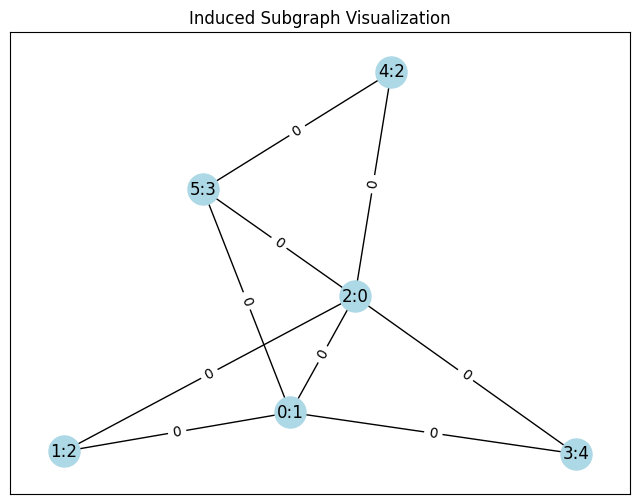

In [12]:
import random
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

def read_graph(file_path):
    vertices = {}  # 存储节点：{vertex_id: label}
    edges = []     # 存储边：[(v1, v2, label)]
    adj_list = defaultdict(list)  # 邻接表：{vertex_id: [(neighbor_id, edge_label)]}
    
    try:
        with open(file_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if not parts:
                    continue
                if parts[0] == 'v':
                    vertex_id, label = int(parts[1]), int(parts[2])
                    vertices[vertex_id] = label
                elif parts[0] == 'e':
                    v1, v2, label = int(parts[1]), int(parts[2]), int(parts[3])
                    edges.append((v1, v2, label))
                    # 构建无向图的邻接表
                    adj_list[v1].append((v2, label))
                    adj_list[v2].append((v1, label))
    except FileNotFoundError:
        raise FileNotFoundError(f"File {file_path} not found.")
    except Exception as e:
        raise ValueError(f"Error reading file: {e}")
    
    return vertices, edges, adj_list

def random_walk_subgraph(vertices, edges, adj_list, num_vertices):
    if num_vertices > len(vertices):
        raise ValueError("Requested subgraph size is larger than the original graph.")
    if num_vertices <= 0:
        raise ValueError("Number of vertices must be positive.")
    
    # 随机游走选择节点
    current_vertex = random.choice(list(vertices.keys()))
    selected_vertices = {current_vertex}
    
    while len(selected_vertices) < num_vertices:
        neighbors = adj_list[current_vertex]
        if not neighbors:
            remaining_vertices = set(vertices.keys()) - selected_vertices
            if not remaining_vertices:
                break
            current_vertex = random.choice(list(remaining_vertices))
            selected_vertices.add(current_vertex)
            continue
        
        next_vertex, _ = random.choice(neighbors)
        if next_vertex not in selected_vertices:
            selected_vertices.add(next_vertex)
        current_vertex = next_vertex
    
    # 补充节点（如果需要）
    while len(selected_vertices) < num_vertices:
        remaining_vertices = set(vertices.keys()) - selected_vertices
        if not remaining_vertices:
            break
        extra_vertex = random.choice(list(remaining_vertices))
        selected_vertices.add(extra_vertex)
    
    # 创建新节点ID映射
    vertex_map = {old_id: new_id for new_id, old_id in enumerate(sorted(selected_vertices))}
    
    # 生成子图的节点
    subgraph_vertices = [(vertex_map[vid], vertices[vid]) for vid in selected_vertices]
    
    # 生成诱导子图的边：包含选定节点间的所有边
    subgraph_edges = []
    for v1, v2, label in edges:
        if v1 in selected_vertices and v2 in selected_vertices:
            new_v1, new_v2 = vertex_map[v1], vertex_map[v2]
            subgraph_edges.append((new_v1, new_v2, label))
    
    return subgraph_vertices, subgraph_edges

def output_subgraph(subgraph_vertices, subgraph_edges):
    output = []
    for vid, label in sorted(subgraph_vertices, key=lambda x: x[0]):
        output.append(f"v {vid} {label}")
    for v1, v2, label in sorted(subgraph_edges, key=lambda x: (x[0], x[1])):
        output.append(f"e {v1} {v2} {label}")
    return "\n".join(output)

def visualize_subgraph(subgraph_vertices, subgraph_edges):
    G = nx.Graph()
    
    # 添加节点
    for vid, label in subgraph_vertices:
        G.add_node(vid, label=label)
    
    # 添加边
    for v1, v2, label in subgraph_edges:
        G.add_edge(v1, v2, label=label)
    
    # 绘制
    pos = nx.spring_layout(G)
    plt.figure(figsize=(8, 6))
    
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
    nx.draw_networkx_edges(G, pos)
    
    node_labels = {vid: f"{vid}:{label}" for vid, label in subgraph_vertices}
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12)
    
    edge_labels = {(v1, v2): label for v1, v2, label in subgraph_edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    
    plt.title("Induced Subgraph Visualization")
    plt.show()

def main():
    file_path = "/home/cc/haibin2/amazon/6/data_graph/data.graph"
    
    try:
        vertices, edges, adj_list = read_graph(file_path)
    except (FileNotFoundError, ValueError) as e:
        print(e)
        return
    
    try:
        # num_vertices = int(input("Enter the number of vertices for the subgraph: "))
        num_vertices = 6
    except ValueError:
        print("Please enter a valid integer.")
        return
    
    try:
        subgraph_vertices, subgraph_edges = random_walk_subgraph(vertices, edges, adj_list, num_vertices)
        result = output_subgraph(subgraph_vertices, subgraph_edges)
        print("Induced Subgraph:")
        print(result)

        visualize_subgraph(subgraph_vertices, subgraph_edges)
        
    except ValueError as e:
        print(e)

if __name__ == "__main__":
    main()

In [13]:
import random
from collections import defaultdict
import os

def read_graph(file_path):
    vertices = {}  # 存储节点：{vertex_id: label}
    edges = []     # 存储边：[(v1, v2, label)]
    adj_list = defaultdict(list)  # 邻接表：{vertex_id: [(neighbor_id, edge_label)]}
    
    try:
        with open(file_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if not parts:
                    continue
                if parts[0] == 'v':
                    vertex_id, label = int(parts[1]), int(parts[2])
                    vertices[vertex_id] = label
                elif parts[0] == 'e':
                    v1, v2, label = int(parts[1]), int(parts[2]), int(parts[3])
                    edges.append((v1, v2, label))
                    adj_list[v1].append((v2, label))
                    adj_list[v2].append((v1, label))
    except FileNotFoundError:
        raise FileNotFoundError(f"File {file_path} not found.")
    except Exception as e:
        raise ValueError(f"Error reading file: {e}")
    
    return vertices, edges, adj_list

def random_walk_subgraph(vertices, edges, adj_list, num_vertices):
    if num_vertices > len(vertices):
        raise ValueError("Requested subgraph size is larger than the original graph.")
    if num_vertices <= 0:
        raise ValueError("Number of vertices must be positive.")
    
    current_vertex = random.choice(list(vertices.keys()))
    selected_vertices = {current_vertex}
    
    while len(selected_vertices) < num_vertices:
        neighbors = adj_list[current_vertex]
        if not neighbors:
            remaining_vertices = set(vertices.keys()) - selected_vertices
            if not remaining_vertices:
                break
            current_vertex = random.choice(list(remaining_vertices))
            selected_vertices.add(current_vertex)
            continue
        
        next_vertex, _ = random.choice(neighbors)
        if next_vertex not in selected_vertices:
            selected_vertices.add(next_vertex)
        current_vertex = next_vertex
    
    while len(selected_vertices) < num_vertices:
        remaining_vertices = set(vertices.keys()) - selected_vertices
        if not remaining_vertices:
            break
        extra_vertex = random.choice(list(remaining_vertices))
        selected_vertices.add(extra_vertex)
    
    vertex_map = {old_id: new_id for new_id, old_id in enumerate(sorted(selected_vertices))}
    subgraph_vertices = [(vertex_map[vid], vertices[vid]) for vid in selected_vertices]
    
    subgraph_edges = []
    for v1, v2, label in edges:
        if v1 in selected_vertices and v2 in selected_vertices:
            new_v1, new_v2 = vertex_map[v1], vertex_map[v2]
            subgraph_edges.append((new_v1, new_v2, label))
    
    return subgraph_vertices, subgraph_edges

def output_subgraph(subgraph_vertices, subgraph_edges):
    output = []
    for vid, label in sorted(subgraph_vertices, key=lambda x: x[0]):
        output.append(f"v {vid} {label}")
    for v1, v2, label in sorted(subgraph_edges, key=lambda x: (x[0], x[1])):
        output.append(f"e {v1} {v2} {label}")
    return "\n".join(output)

def save_subgraph(subgraph_vertices, subgraph_edges, output_path):
    result = output_subgraph(subgraph_vertices, subgraph_edges)
    try:
        with open(output_path, 'w') as f:
            f.write(result)
    except Exception as e:
        raise ValueError(f"Error writing to {output_path}: {e}")

def main():
    # 文件路径
    input_file = "/home/cc/haibin2/amazon/6/data_graph/data.graph"

    output_dir = "/home/cc/haibin2/amazon/7/"
    
    # 确保输出目录存在
    try:
        os.makedirs(output_dir, exist_ok=True)
    except Exception as e:
        print(f"Error creating directory {output_dir}: {e}")
        return
    
    # 读取图
    try:
        vertices, edges, adj_list = read_graph(input_file)
    except (FileNotFoundError, ValueError) as e:
        print(e)
        return
    
    # 输入子图节点数
    try:
        # num_vertices = int(input("Enter the number of vertices for each subgraph: "))
        num_vertices = 7
    except ValueError:
        print("Please enter a valid integer.")
        return
    
    # 生成并保存100个子图
    num_subgraphs = 100
    try:
        for i in range(1, num_subgraphs + 1):
            subgraph_vertices, subgraph_edges = random_walk_subgraph(vertices, edges, adj_list, num_vertices)
            output_path = os.path.join(output_dir, f"Q_{i}")
            save_subgraph(subgraph_vertices, subgraph_edges, output_path)
            print(f"Saved subgraph Q_{i} to {output_path}")
    except ValueError as e:
        print(e)
        return

if __name__ == "__main__":
    main()

Saved subgraph Q_1 to /home/cc/haibin2/amazon/7/Q_1
Saved subgraph Q_2 to /home/cc/haibin2/amazon/7/Q_2
Saved subgraph Q_3 to /home/cc/haibin2/amazon/7/Q_3
Saved subgraph Q_4 to /home/cc/haibin2/amazon/7/Q_4
Saved subgraph Q_5 to /home/cc/haibin2/amazon/7/Q_5
Saved subgraph Q_6 to /home/cc/haibin2/amazon/7/Q_6
Saved subgraph Q_7 to /home/cc/haibin2/amazon/7/Q_7
Saved subgraph Q_8 to /home/cc/haibin2/amazon/7/Q_8
Saved subgraph Q_9 to /home/cc/haibin2/amazon/7/Q_9
Saved subgraph Q_10 to /home/cc/haibin2/amazon/7/Q_10
Saved subgraph Q_11 to /home/cc/haibin2/amazon/7/Q_11
Saved subgraph Q_12 to /home/cc/haibin2/amazon/7/Q_12
Saved subgraph Q_13 to /home/cc/haibin2/amazon/7/Q_13
Saved subgraph Q_14 to /home/cc/haibin2/amazon/7/Q_14
Saved subgraph Q_15 to /home/cc/haibin2/amazon/7/Q_15
Saved subgraph Q_16 to /home/cc/haibin2/amazon/7/Q_16
Saved subgraph Q_17 to /home/cc/haibin2/amazon/7/Q_17
Saved subgraph Q_18 to /home/cc/haibin2/amazon/7/Q_18
Saved subgraph Q_19 to /home/cc/haibin2/amazon

In [17]:
import random
from collections import defaultdict
import os
from tqdm import tqdm

def read_graph(file_path):
    vertices = {}  # 存储节点：{vertex_id: label}
    edges = []     # 存储边：[(v1, v2, label)]
    adj_list = defaultdict(list)  # 邻接表：{vertex_id: [(neighbor_id, edge_label)]}
    
    try:
        with open(file_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if not parts:
                    continue
                if parts[0] == 'v':
                    vertex_id, label = int(parts[1]), int(parts[2])
                    vertices[vertex_id] = label
                elif parts[0] == 'e':
                    v1, v2, label = int(parts[1]), int(parts[2]), int(parts[3])
                    edges.append((v1, v2, label))
                    adj_list[v1].append((v2, label))
                    adj_list[v2].append((v1, label))
    except FileNotFoundError:
        raise FileNotFoundError(f"File {file_path} not found.")
    except Exception as e:
        raise ValueError(f"Error reading file: {e}")
    
    return vertices, edges, adj_list

def random_walk_subgraph(vertices, edges, adj_list, num_vertices):
    if num_vertices > len(vertices):
        raise ValueError("Requested subgraph size is larger than the original graph.")
    if num_vertices <= 0:
        raise ValueError("Number of vertices must be positive.")
    
    current_vertex = random.choice(list(vertices.keys()))
    selected_vertices = {current_vertex}
    
    while len(selected_vertices) < num_vertices:
        neighbors = adj_list[current_vertex]
        if not neighbors:
            remaining_vertices = set(vertices.keys()) - selected_vertices
            if not remaining_vertices:
                break
            current_vertex = random.choice(list(remaining_vertices))
            selected_vertices.add(current_vertex)
            continue
        
        next_vertex, _ = random.choice(neighbors)
        if next_vertex not in selected_vertices:
            selected_vertices.add(next_vertex)
        current_vertex = next_vertex
    
    while len(selected_vertices) < num_vertices:
        remaining_vertices = set(vertices.keys()) - selected_vertices
        if not remaining_vertices:
            break
        extra_vertex = random.choice(list(remaining_vertices))
        selected_vertices.add(extra_vertex)
    
    vertex_map = {old_id: new_id for new_id, old_id in enumerate(sorted(selected_vertices))}
    subgraph_vertices = [(vertex_map[vid], vertices[vid]) for vid in selected_vertices]
    
    subgraph_edges = []
    for v1, v2, label in edges:
        if v1 in selected_vertices and v2 in selected_vertices:
            new_v1, new_v2 = vertex_map[v1], vertex_map[v2]
            subgraph_edges.append((new_v1, new_v2, label))
    
    return subgraph_vertices, subgraph_edges

def output_subgraph(subgraph_vertices, subgraph_edges):
    output = []
    for vid, label in sorted(subgraph_vertices, key=lambda x: x[0]):
        output.append(f"v {vid} {label}")
    for v1, v2, label in sorted(subgraph_edges, key=lambda x: (x[0], x[1])):
        output.append(f"e {v1} {v2} {label}")
    return "\n".join(output)

def save_subgraph(subgraph_vertices, subgraph_edges, output_path):
    result = output_subgraph(subgraph_vertices, subgraph_edges)
    try:
        with open(output_path, 'w') as f:
            f.write(result)
    except Exception as e:
        raise ValueError(f"Error writing to {output_path}: {e}")

def main():
 # 文件路径
    input_file = "/home/cc/haibin2/amazon/6/data_graph/data.graph"

    output_dir = "/home/cc/haibin2/amazon/6_s/"
    
    # 确保输出目录存在
    try:
        os.makedirs(output_dir, exist_ok=True)
    except Exception as e:
        print(f"Error creating directory {output_dir}: {e}")
        return
    
    # 读取图
    try:
        vertices, edges, adj_list = read_graph(input_file)
    except (FileNotFoundError, ValueError) as e:
        print(e)
        return
    
    # 输入子图节点数
    try:
        # num_vertices = int(input("Enter the number of vertices for each subgraph: "))
        num_vertices = 10
    except ValueError:
        print("Please enter a valid integer.")
        return
    
    # 生成并保存100个子图，带进度条
    num_subgraphs = 100
    try:
        for i in tqdm(range(1, num_subgraphs + 1), desc="Generating subgraphs", unit="subgraph"):
            subgraph_vertices, subgraph_edges = random_walk_subgraph(vertices, edges, adj_list, num_vertices)
            output_path = os.path.join(output_dir, f"Q_{i}")
            save_subgraph(subgraph_vertices, subgraph_edges, output_path)
            # 进度条更新时不再打印保存信息，避免终端混乱
    except ValueError as e:
        print(e)
        return
    print(f"Successfully generated and saved {num_subgraphs} subgraphs to {output_dir}")

if __name__ == "__main__":
    main()

Generating subgraphs: 100%|██████████| 100/100 [00:20<00:00,  4.82subgraph/s]


Successfully generated and saved 100 subgraphs to /home/cc/haibin2/amazon/6_s/


In [7]:
import random
from collections import defaultdict
import os
from tqdm import tqdm

def read_graph(file_path):
    vertices = {}  # 存储节点：{vertex_id: label}
    edges = []     # 存储边：[(v1, v2, label)]
    adj_list = defaultdict(list)  # 邻接表：{vertex_id: [(neighbor_id, edge_label)]}
    
    try:
        with open(file_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if not parts:
                    continue
                if parts[0] == 'v':
                    vertex_id, label = int(parts[1]), int(parts[2])
                    vertices[vertex_id] = label
                elif parts[0] == 'e':
                    v1, v2, label = int(parts[1]), int(parts[2]), int(parts[3])
                    edges.append((v1, v2, label))
                    adj_list[v1].append((v2, label))
                    adj_list[v2].append((v1, label))
    except FileNotFoundError:
        raise FileNotFoundError(f"File {file_path} not found.")
    except Exception as e:
        raise ValueError(f"Error reading file: {e}")
    
    return vertices, edges, adj_list

def is_tree(subgraph_vertices, subgraph_edges):
    """
    判断子图是否为树：无环且连通（边数 = 节点数 - 1）。
    """
    num_vertices = len(subgraph_vertices)
    num_edges = len(subgraph_edges)
    
    # 树的要求：边数 = 节点数 - 1
    if num_edges != num_vertices - 1:
        return False
    
    # 检查连通性和无环（使用DFS）
    if num_vertices == 0:
        return True
    
    # 构建邻接表
    adj = defaultdict(list)
    for v1, v2, _ in subgraph_edges:
        adj[v1].append(v2)
        adj[v2].append(v1)
    
    # DFS 检查连通性和环
    visited = set()
    def dfs(vertex, parent):
        visited.add(vertex)
        for neighbor in adj[vertex]:
            if neighbor != parent:
                if neighbor in visited:
                    return False  # 发现环
                if not dfs(neighbor, vertex):
                    return False
        return True
    
    # 从第一个节点开始DFS
    start_vertex = subgraph_vertices[0][0]
    if not dfs(start_vertex, None):
        return False
    
    # 确认所有节点都访问到（连通）
    return len(visited) == num_vertices

def get_average_degree(subgraph_vertices, subgraph_edges):
    """
    计算平均度数：总边数 / 节点数（无向图每条边计为2度）。
    """
    num_vertices = len(subgraph_vertices)
    num_edges = len(subgraph_edges)
    if num_vertices == 0:
        return 0
    # 无向图每条边贡献2个度
    total_degree = 2 * num_edges
    return total_degree / num_vertices

def random_walk_subgraph(vertices, edges, adj_list, num_vertices):
    if num_vertices > len(vertices):
        raise ValueError("Requested subgraph size is larger than the original graph.")
    if num_vertices <= 0:
        raise ValueError("Number of vertices must be positive.")
    
    current_vertex = random.choice(list(vertices.keys()))
    selected_vertices = {current_vertex}
    
    while len(selected_vertices) < num_vertices:
        neighbors = adj_list[current_vertex]
        if not neighbors:
            remaining_vertices = set(vertices.keys()) - selected_vertices
            if not remaining_vertices:
                break
            current_vertex = random.choice(list(remaining_vertices))
            selected_vertices.add(current_vertex)
            continue
        
        next_vertex, _ = random.choice(neighbors)
        if next_vertex not in selected_vertices:
            selected_vertices.add(next_vertex)
        current_vertex = next_vertex
    
    while len(selected_vertices) < num_vertices:
        remaining_vertices = set(vertices.keys()) - selected_vertices
        if not remaining_vertices:
            break
        extra_vertex = random.choice(list(remaining_vertices))
        selected_vertices.add(extra_vertex)
    
    vertex_map = {old_id: new_id for new_id, old_id in enumerate(sorted(selected_vertices))}
    subgraph_vertices = [(vertex_map[vid], vertices[vid]) for vid in selected_vertices]
    
    subgraph_edges = []
    for v1, v2, label in edges:
        if v1 in selected_vertices and v2 in selected_vertices:
            new_v1, new_v2 = vertex_map[v1], vertex_map[v2]
            subgraph_edges.append((new_v1, new_v2, label))
    
    return subgraph_vertices, subgraph_edges

def output_subgraph(subgraph_vertices, subgraph_edges):
    output = []
    for vid, label in sorted(subgraph_vertices, key=lambda x: x[0]):
        output.append(f"v {vid} {label}")
    for v1, v2, label in sorted(subgraph_edges, key=lambda x: (x[0], x[1])):
        output.append(f"e {v1} {v2} {label}")
    return "\n".join(output)

def save_subgraph(subgraph_vertices, subgraph_edges, output_path):
    result = output_subgraph(subgraph_vertices, subgraph_edges)
    try:
        with open(output_path, 'w') as f:
            f.write(result)
    except Exception as e:
        raise ValueError(f"Error writing to {output_path}: {e}")

def main():
# 读取图
    input_file = "/home/cc/haibin2/livejournal/30/data_graph/data.graph"
    try:
        vertices, edges, adj_list = read_graph(input_file)
    except (FileNotFoundError, ValueError) as e:
        print(e)
        return
    
    # 遍历不同的 num_vertices
    for num_vertices in [6, 7, 8, 9, 10]:
        print(f"\nGenerating subgraphs for num_vertices = {num_vertices}")
        
        # 设置输出目录
        output_dir = f"/home/cc/haibin2/livejournal/{num_vertices}_self"
        tree_dir = os.path.join(output_dir, "tree")
        sparse_dir = os.path.join(output_dir, "sparse")
        dense_dir = os.path.join(output_dir, "dense")
        
        # 确保输出目录存在
        try:
            os.makedirs(tree_dir, exist_ok=True)
            os.makedirs(sparse_dir, exist_ok=True)
            os.makedirs(dense_dir, exist_ok=True)
        except Exception as e:
            print(f"Error creating directories for num_vertices = {num_vertices}: {e}")
            continue
        
        # 生成并保存100个子图
        num_subgraphs = 100
        max_trees = 15  # 最大树形子图数量
        counts = {"tree": 0, "sparse": 0, "dense": 0}  # 统计各类子图数量
        generated_subgraphs = 0  # 已生成子图计数
        
        try:
            with tqdm(total=num_subgraphs, desc=f"Generating subgraphs (n={num_vertices})", unit="subgraph") as pbar:
                i = 1
                while generated_subgraphs < num_subgraphs:
                    subgraph_vertices, subgraph_edges = random_walk_subgraph(vertices, edges, adj_list, num_vertices)
                    
                    # 分类子图
                    if is_tree(subgraph_vertices, subgraph_edges):
                        if counts["tree"] >= max_trees:
                            continue  # 如果树形子图已达上限，重新生成
                        category = "tree"
                        output_dir_category = tree_dir
                    else:
                        avg_degree = get_average_degree(subgraph_vertices, subgraph_edges)
                        if avg_degree < 3:
                            category = "sparse"
                            output_dir_category = sparse_dir
                        else:
                            category = "dense"
                            output_dir_category = dense_dir
                    
                    # 保存子图
                    output_path = os.path.join(output_dir_category, f"Q_{i}")
                    save_subgraph(subgraph_vertices, subgraph_edges, output_path)
                    counts[category] += 1
                    generated_subgraphs += 1
                    i += 1
                    pbar.update(1)
        except ValueError as e:
            print(f"Error for num_vertices = {num_vertices}: {e}")
            continue
        
        print(f"Successfully generated and saved {num_subgraphs} subgraphs for num_vertices = {num_vertices}:")
        print(f"- Tree subgraphs: {counts['tree']} (saved in {tree_dir})")
        print(f"- Sparse subgraphs: {counts['sparse']} (saved in {sparse_dir})")
        print(f"- Dense subgraphs: {counts['dense']} (saved in {dense_dir})")


if __name__ == "__main__":
    main()


Generating subgraphs for num_vertices = 6


Generating subgraphs (n=6): 100%|██████████| 100/100 [07:27<00:00,  4.48s/subgraph]


Successfully generated and saved 100 subgraphs for num_vertices = 6:
- Tree subgraphs: 15 (saved in /home/cc/haibin2/livejournal/6_self/tree)
- Sparse subgraphs: 77 (saved in /home/cc/haibin2/livejournal/6_self/sparse)
- Dense subgraphs: 8 (saved in /home/cc/haibin2/livejournal/6_self/dense)

Generating subgraphs for num_vertices = 7


Generating subgraphs (n=7): 100%|██████████| 100/100 [07:27<00:00,  4.47s/subgraph]


Successfully generated and saved 100 subgraphs for num_vertices = 7:
- Tree subgraphs: 15 (saved in /home/cc/haibin2/livejournal/7_self/tree)
- Sparse subgraphs: 74 (saved in /home/cc/haibin2/livejournal/7_self/sparse)
- Dense subgraphs: 11 (saved in /home/cc/haibin2/livejournal/7_self/dense)

Generating subgraphs for num_vertices = 8


Generating subgraphs (n=8): 100%|██████████| 100/100 [05:39<00:00,  3.40s/subgraph]


Successfully generated and saved 100 subgraphs for num_vertices = 8:
- Tree subgraphs: 15 (saved in /home/cc/haibin2/livejournal/8_self/tree)
- Sparse subgraphs: 74 (saved in /home/cc/haibin2/livejournal/8_self/sparse)
- Dense subgraphs: 11 (saved in /home/cc/haibin2/livejournal/8_self/dense)

Generating subgraphs for num_vertices = 9


Generating subgraphs (n=9): 100%|██████████| 100/100 [05:45<00:00,  3.45s/subgraph]


Successfully generated and saved 100 subgraphs for num_vertices = 9:
- Tree subgraphs: 15 (saved in /home/cc/haibin2/livejournal/9_self/tree)
- Sparse subgraphs: 68 (saved in /home/cc/haibin2/livejournal/9_self/sparse)
- Dense subgraphs: 17 (saved in /home/cc/haibin2/livejournal/9_self/dense)

Generating subgraphs for num_vertices = 10


Generating subgraphs (n=10): 100%|██████████| 100/100 [05:36<00:00,  3.36s/subgraph]

Successfully generated and saved 100 subgraphs for num_vertices = 10:
- Tree subgraphs: 15 (saved in /home/cc/haibin2/livejournal/10_self/tree)
- Sparse subgraphs: 63 (saved in /home/cc/haibin2/livejournal/10_self/sparse)
- Dense subgraphs: 22 (saved in /home/cc/haibin2/livejournal/10_self/dense)
